In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# %matplotlib inline

import vtk
import csv

ModuleNotFoundError: No module named 'vtkOpenGLKitPython'

In [4]:
def vtkToCSV(fileIn, fileOut):
    reader = vtk.vtkGenericDataObjectReader()
    reader.SetFileName(fileIn)
    reader.Update()

    point_obj = reader.GetOutput()
    points = point_obj.GetPoints()

    table = vtk.vtkDataObjectToTable()
    table.SetInputData(point_obj)
    table.Update()
    table.GetOutput().AddColumn(points.GetData())
    table.Update()

    writer = vtk.vtkDelimitedTextWriter()
    writer.SetInputConnection(table.GetOutputPort())
    writer.SetFileName(fileOut)
    writer.Update()
    writer.Write()

In [8]:
    general_path = '../../BTP/salma/data1/post/dump_liggghts_run.30200000.'
fileIn = general_path + 'vtk'
fileOut  =  general_path + 'csv'

r1 = 0.003
r2 = 0.006
rhoParticle = 2500
mass_small = 4.19*(r1**3)*rhoParticle
mass_large = 4.19*(r2**3)*rhoParticle
print(mass_large, mass_small)
# fileIn

0.0022626 0.000282825


In [9]:
vtkToCSV(fileIn,fileOut)

In [10]:
d140 = pd.read_csv(fileOut)
d140.head()

,id,type,mass,v:0,v:1,v:2,f:0,f:1,f:2,radius,f_dragforce[1-3]:0,f_dragforce[1-3]:1,f_dragforce[1-3]:2,Points:0,Points:1,Points:2
0,562,1,0.000283,-6.776050e-08,1.272280e-07,3.712600e-08,-2.693990e-08,4.662070e-09,-1.602560e-08,0.003,8.583450e-08,-2.499710e-08,2.838490e-08,-0.007532,-0.046391,0.002940
1,189,1,0.000283,-5.262230e-08,4.747550e-08,2.806980e-08,-1.653650e-08,-1.024610e-09,4.757220e-09,0.003,6.537130e-08,-2.031310e-08,2.851550e-08,-0.001582,-0.046978,0.002993
2,1967,1,0.000283,-1.040550e-07,-6.284320e-08,8.305100e-08,2.918330e-09,-5.349120e-09,-3.031390e-09,0.003,-6.475190e-08,-1.810890e-07,6.786660e-09,-0.024623,-0.040063,0.002945
3,2169,1,0.000283,-6.013360e-05,4.895290e-05,9.412440e-09,4.822030e-08,-3.990910e-08,-3.633470e-09,0.003,4.580430e-08,-4.707850e-08,1.253730e-08,-0.019156,-0.042773,0.002995
4,1204,1,0.000283,-8.907060e-08,8.304710e-08,3.905960e-08,-2.533390e-08,-4.966560e-10,7.281270e-09,0.003,7.903060e-08,-4.293410e-09,1.224290e-08,-0.013579,-0.045019,0.002971


In [11]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Survived')

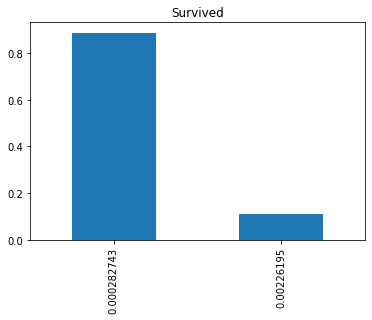

In [12]:
plt.subplot2grid((1,1), (0,0))
d140.mass.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

In [13]:
data = d140.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})

In [14]:
N = 10
height = (data['z'].max()+0.0001)/N
breakpoint = []
for i in range(0,N):
    breakpoint.append(height*(i+1))
# print(height)
# breakpoint = [height, height*2, height*3, height*4, height*5]
breakpoint

[0.012892,
 0.025784,
 0.038676,
 0.051568,
 0.06446,
 0.077352,
 0.090244,
 0.103136,
 0.116028,
 0.12892]

In [15]:
from bisect import bisect

def grade(score, breakpoints=breakpoint, marks='abcdefghij'):
#         print(score)
        i = bisect(breakpoints, score)
#         print(marks[i])
        return marks[i]

In [16]:
s = d140[(d140.mass <= .001 )]
# smaller.head(5)

l = d140[(d140.mass >= .001 )]
l.head(5)

smaller = s.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})
larger = l.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})

smaller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 0 to 2789
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2480 non-null   int64  
 1   type                2480 non-null   int64  
 2   mass                2480 non-null   float64
 3   v:0                 2480 non-null   float64
 4   v:1                 2480 non-null   float64
 5   v:2                 2480 non-null   float64
 6   f:0                 2480 non-null   float64
 7   f:1                 2480 non-null   float64
 8   f:2                 2480 non-null   float64
 9   radius              2480 non-null   float64
 10  f_dragforce[1-3]:0  2480 non-null   float64
 11  f_dragforce[1-3]:1  2480 non-null   float64
 12  f_dragforce[1-3]:2  2480 non-null   float64
 13  x                   2480 non-null   float64
 14  y                   2480 non-null   float64
 15  z                   2480 non-null   float64
dtypes: flo

In [17]:
a,b,c,d,e, f, g, h, i, j= [], [], [] ,[], [],[], [], [] ,[], []
small_lists = [a,b,c,d,e, f, g, h, i, j]
marks = 'abcdefghij'
for item in [(grade(score),score) for score in smaller.z ]:
    l = marks.index(item[0])
    small_lists[l].append(item[1])
    
a,b,c,d,e, f, g, h, i, j= [], [], [] ,[], [],[], [], [] ,[], []
large_lists = [a,b,c,d,e, f, g, h, i, j]  
for item in [(grade(score),score) for score in larger.z ]:
    l = marks.index(item[0])
    large_lists[l].append(item[1])


In [18]:
# small_sub = [ len(small_lists[0]),len(small_lists[1]),len(small_lists[2]),len(small_lists[3]),len(small_lists[4]), 
#             len(small_lists[5]),len(small_lists[6]),len(small_lists[7]),len(small_lists[8]),len(small_lists[9])]
small_sub = []
large_sub = []
for i in range(0,N):
    small_sub.append(len(small_lists[i]))
    large_sub.append(len(large_lists[i]))

counter = [small_sub, large_sub]
counter

[[440, 115, 8, 9, 162, 252, 368, 465, 493, 168],
 [9, 56, 71, 66, 45, 32, 18, 10, 3, 0]]

In [19]:
ratios = []
normalVal = []
for i in range(0, N):
    ratios.append(((small_sub[i]*mass_small)/(small_sub[i]*mass_small + large_sub[i]*mass_large))/0.5)
    normalVal.append(1)
ratios
    

[1.71875,
 0.40852575488454707,
 0.027777777777777776,
 0.0335195530726257,
 0.6206896551724138,
 0.9921259842519685,
 1.4375,
 1.7064220183486238,
 1.9071566731141198,
 2.0]

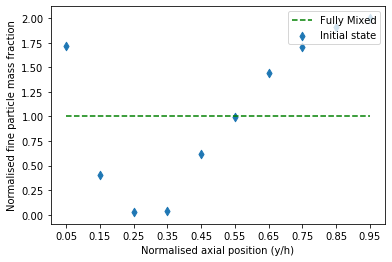

In [20]:
names = ['0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95']

fig, ax = plt.subplots()
# fig.suptitle('Plot vel. = 3 m/s, Particle radius: 3-663mm, T = 10sec')
ax.scatter(names, ratios, label="Initial state", marker='d')
ax.plot(names, normalVal, label="Fully Mixed", color='g', linestyle='dashed')

plt.legend(loc='upper right')
plt.ylabel("Normalised fine particle mass fraction")
plt.xlabel("Normalised axial position (y/h)")
# plt.savefig('../graphs/main/Initial.svg', format='svg')
plt.show()
# print(ratios)

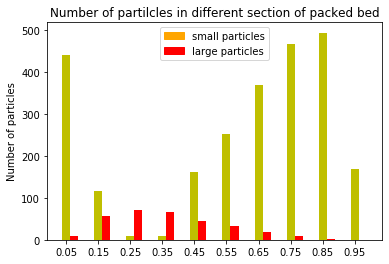

In [21]:
colors = {'small particles':'orange', 'large particles':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

X = np.arange(10)

plt.ylabel('Number of particles')
plt.title('Number of partilcles in different section of packed bed')
plt.xticks(X, ('0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95'))

plt.bar(X + 0.00, counter[0], color = 'y', width = 0.25)
plt.bar(X + 0.25, counter[1], color = 'r', width = 0.25)

plt.show()

In [22]:
# pi = []
import math
def get_si(counter):
    p = 0
    for i in range(0, len(counter)):
#         print(counter[1][i])
        p = p + ((counter[i]) - 1) ** 2
#         print(p)
    p = p/len(counter)
#     pi.append(math.sqrt(p))
    return math.sqrt(p)

si = get_si(ratios)
# print(pi)
si


0.7350546737631829

In [23]:
rat_32_1 = [1.5789473684210527, 0.4, 0.046511627906976744, 0.055248618784530384, 0.5029239766081872, 1.0955165692007798, 1.3879781420765027, 1.6444444444444444, 1.9382239382239381, 2.0]
rat_32_2 = [1.606060606060606,0.5964912280701754,0.0425531914893617,0.010968921389396709,0.17142857142857143,0.8594059405940595,1.5488721804511276,1.9094339622641507,1.9694656488549618,2.0]
rat_35_1 = [1.4307116104868915, 0.5566218809980806, 0.072992700729927, 0.015748031496062992, 0.19130434782608693, 0.9861386138613862, 1.5773584905660376, 1.8780952380952383, 2.0, 2.0]
rat_35_2 = [1.2481203007518797, 0.47780126849894294, 0.0966542750929368, 0.043392504930966476, 0.40625, 1.0495049504950498, 1.2822429906542057, 1.752895752895753, 2.0, 2.0]
rat_3_1 = [1.594541910331384, 0.3582089552238806, 0.038528896672504385, 0.03125, 0.4888888888888889, 1.1496062992125984, 1.4142581888246628, 1.7566539923954372, 1.9375, 1.9255813953488372]
rat_3_2 = [1.758490566037736, 0.8637236084452976, 0.07665505226480836, 0.0, 0.1705989110707804, 0.9421487603305786, 1.265774378585086, 1.6569200779727093, 1.9080459770114941, 2.0]
rat_3_t_20 = [1.6569200779727093, 0.4705882352941176, 0.0437956204379562, 0.023166023166023165, 0.41495327102803736, 1.2258064516129032, 1.3172541743970316, 1.6595744680851063, 1.8737672583826428, 2.0]
rat_3_t_50 = [1.7042513863216264, 0.6783831282952548, 0.08823529411764705, 0.04081632653061225, 0.48327137546468407, 1.0387596899224807, 1.3069679849340867, 1.5978456014362659, 1.9342915811088295, 1.8840579710144927]
rat_4 = [0.6337760910815938, 0.5508317929759705, 0.11406844106463879, 0.04735883424408015, 0.41467889908256883, 1.1719038817005545, 1.8850987432675044, 2.0, 2.0, 2.0]
rat_45 = [0.5777777777777778, 0.27360308285163776, 0.061538461538461535, 0.05273833671399595, 0.3283582089552239, 1.1059730250481694, 1.8467432950191571, 2.0, 2.0, 2.0]
rat_48 = [0.0535279805352798, 0.027397260273972605, 0.0, 0.04143126177024482, 0.4852071005917159, 1.493482309124767, 2.0, 2.0, 2.0, 2.0]
sir = [.773,.72,.72,.943,1.052,1.048,0.98,.983,.934,1.431]
rec_14 = [1.0233393177737882, 0.0392156862745098, 0.03717472118959107, 0.1037037037037037, 0.5854616895874263, 1.3320079522862822, 1.5581854043392505, 1.8128654970760234, 1.7602996254681649, 1.908831908831909]
rec_18 = [0.6817447495961227, 0.0, 0.048109965635738834, 0.41391304347826086, 1.1028037383177571, 1.4619469026548673, 1.5485008818342152, 1.800711743772242, 1.6988235294117646, 1.5061728395061726]
rec_2 = [0.6334519572953737, 0.014598540145985401, 0.15151515151515155, 0.5151515151515151, 1.060665362035225, 1.3295238095238096, 1.4744525547445255, 1.6155268022181146, 1.5644283121597096, 1.811764705882353]
rec_25 = [0.15242494226327943, 0.01697792869269949, 0.15151515151515155, 0.4496124031007752, 1.0130841121495326, 1.3235294117647058, 1.6119402985074627, 1.8208955223880599, 1.9699248120300752, 2.0]


q_3_663_10 = [1.9834710743801653, 1.3222836095764272, 0.9751434034416825, 0.9163346613545815, 0.736, 0.8704061895551258, 0.734375, 0.6920152091254753, 0.8504854368932038, 0.9349112426035502]
q_3_663_60 = [1.8294243070362475, 1.3308550185873604, 0.7509881422924901, 0.7047619047619048, 0.7945205479452055, 0.6073500967117988, 0.7788649706457925, 0.9863547758284601, 1.0751445086705202, 1.2934472934472936]


pi_ratios = [0.7210536131530434, 0.7873695067193854, 0.7725778917291553, 0.7118208707450242, 0.7342777380955094, 0.7392175271151585, 0.7261389935720296, 0.6874135852743507, 0.786372905721689, 0.8162870811950581, 0.9093489933773439, 0.20183954022936143, 0.7288658519685947, 0.6527940176443123, 0.6127123347453827, 0.7616761725941585, 0.36840097680221745, 0.35830473328157303
]

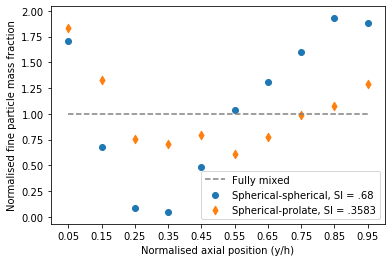

In [27]:
names = ['0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95']

fig, ax = plt.subplots()
# fig.suptitle('Plot At Multiple Velocities (Rectangular Column)')
ax.scatter(names, rat_3_t_50, label="Spherical-spherical, SI = .68", marker='o')
ax.scatter(names, q_3_663_60, label="Spherical-prolate, SI = .3583", marker='d')
# ax.scatter(names, rec_2, label="u = 2 m/s, SI = .6127", marker='d')
# ax.scatter(names, rat_4, label="Rectangular column", marker='d')
# ax.scatter(names, rat_3_t_50, label="u = 50 sec.", marker='<')
# ax.scatter(names, rec_2, label="u = 2 m/s", marker='o')
# ax.scatter(names,  rec_25, label="u = 2.5 m/s, SI = .7616", marker='d')
# ax.scatter(names, rat_3_t_50, label="u = 2.5 m/s", marker='d')
# ax.scatter(names, rat_45, label="u = 4.5 m/s", marker='x')
# ax.scatter(names, rat_48, label="u = 4.8 m/s", marker='h')
ax.plot(names, normalVal, label="Fully mixed", color='grey', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylabel("Normalised fine particle mass fraction")
plt.xlabel("Normalised axial position (y/h)")
# plt.savefig('../graphs/main/ss-sp.svg', format='svg')
plt.show()